In [0]:
#miniproject

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
data= pd.read_csv("train_2v.csv")

In [37]:
print(data.shape)
data_copy = data

(43400, 12)


In [38]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [39]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [40]:
data['work_type'].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [41]:
data['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [42]:
data['smoking_status'].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [43]:
data['stroke'].unique()

array([0, 1])

In [44]:
data['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

More number of zeros are present, number of 1; very low hence the predictions will be affected.

In [45]:
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [46]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [0]:
corr = data.corr()

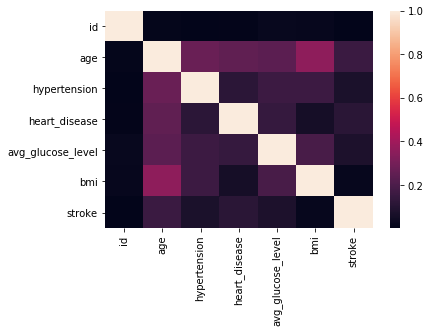

In [48]:
# Correlation heatm
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

In [0]:
#drop id
data.drop("id",axis=1,inplace=True)

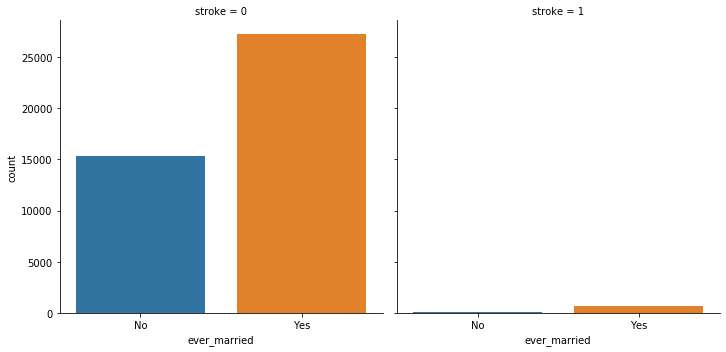

In [50]:
sns.catplot(x='ever_married',kind='count',col='stroke',data=data)

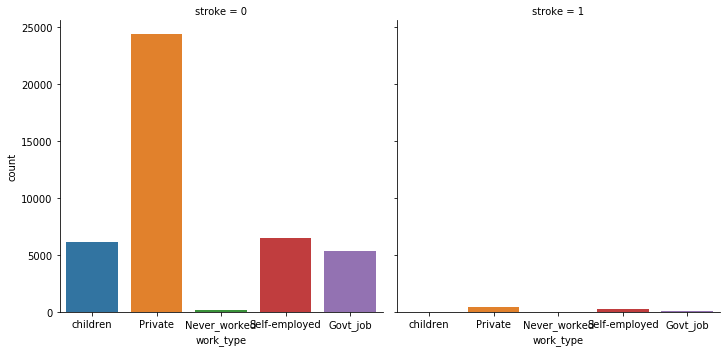

In [51]:
sns.catplot(x='work_type',kind='count',col='stroke',data=data)

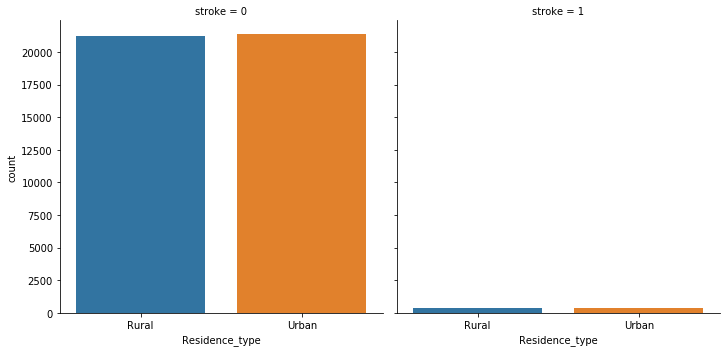

In [52]:
sns.catplot(x='Residence_type',kind='count',col='stroke',data=data)

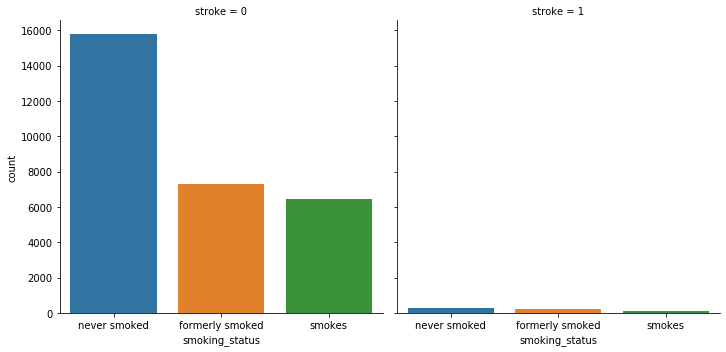

In [53]:
sns.catplot(x='smoking_status',kind='count',col='stroke',data=data)

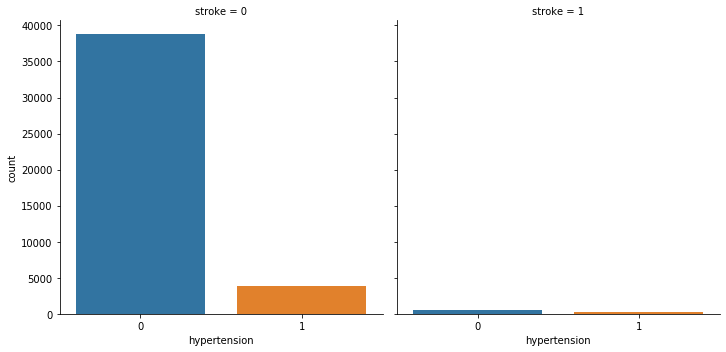

In [54]:
sns.catplot(x='hypertension',kind='count',col='stroke',data=data)

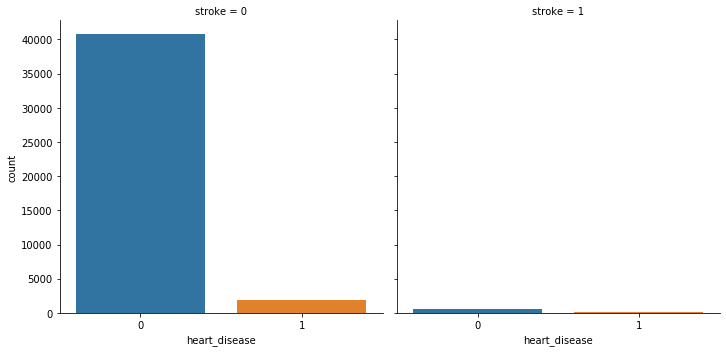

In [55]:
sns.catplot(x='heart_disease',kind='count',col='stroke',data=data)

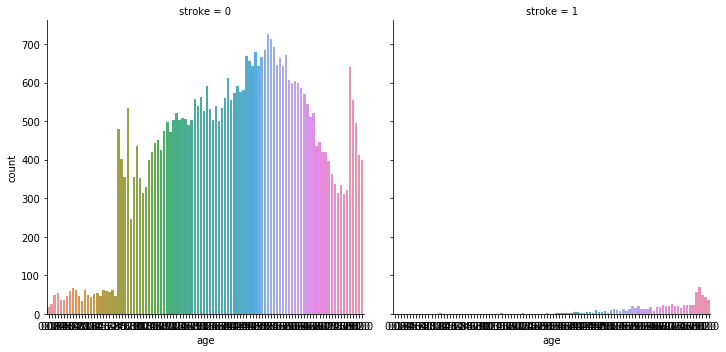

In [56]:
sns.catplot(x='age',kind='count',col='stroke',data=data)


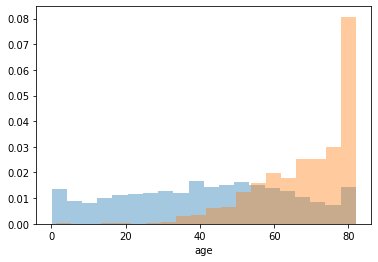

In [57]:
sns.distplot(data.loc[data['stroke'] == 0]['age'],kde=False, norm_hist=True, bins=20)
sns.distplot(data.loc[data['stroke'] == 1]['age'],kde=False, norm_hist=True, bins=20)

In [0]:
#add more plots age

In [0]:
#missing data

In [0]:
data['bmi'].replace(np.nan, data['bmi'].astype('float').mean(axis=0), inplace=True)

In [0]:
from sklearn import preprocessing
lbl=preprocessing.LabelEncoder()
data['gender'] = lbl.fit_transform(data['gender'])
data['ever_married'] = lbl.fit_transform(data['ever_married'])
data['work_type'] = lbl.fit_transform(data['work_type'])
data['Residence_type'] = lbl.fit_transform(data['Residence_type'])


In [0]:
data_drop_smoke = data

In [0]:
#drop smoke status from data_drop_smoke


In [0]:
data_drop_smoke.drop('smoking_status',axis =1,inplace=True)

In [0]:
data_drop_smoke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

In [0]:
# x and y
X = data_drop_smoke.iloc[:, data_drop_smoke.columns!= "stroke"]
Y = data_drop_smoke.iloc[:, data_drop_smoke.columns == "stroke"]


In [0]:
#split data
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)


In [0]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
ros=RandomOverSampler(random_state=42)
sm = SMOTE(random_state=27, ratio=1.0)

print(data_drop_smoke.stroke.value_counts())


#X_res,y_res =ros.fit_resample(X_trainset,y_trainset)
X_smot, y_smot = sm.fit_sample(X_train, Y_train)

0    42617
1      783
Name: stroke, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print('Resampled dataset shape %s' % Counter(y_smot))

Resampled dataset shape Counter({0: 29818, 1: 29818})


In [0]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_smot,y_smot)
y_preddt = classifier.predict(X_test)


In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score

In [0]:
print(accuracy_score(Y_test,y_preddt))
print(recall_score(Y_test,y_preddt))
print(confusion_matrix(Y_test,y_preddt))
print("f1 score is:",f1_score(Y_test,y_preddt))

0.9615207373271889
0.08144796380090498
[[12501   298]
 [  203    18]]
f1 score is: 0.06703910614525138


In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_smot,y_smot)
y_predRF = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
print(accuracy_score(Y_test,y_predRF))
print(recall_score(Y_test,y_predRF))
print(confusion_matrix(Y_test,y_predRF))
print("f1 score is:",f1_score(Y_test,y_predRF))

0.9794162826420891
0.0
[[12752    47]
 [  221     0]]
f1 score is: 0.0


In [0]:
data3= pd.get_dummies(data["salary"],prefix="sal",)

In [0]:
data4=pd.concat((data2,data3),axis = 1)

In [0]:
data4.drop("department",axis=1,inplace=True)

In [0]:
# x and y
X = data.iloc[:, data.columns!= "stroke"]
Y = data.iloc[:, data.columns == "stroke"]

In [0]:
#split data
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)


In [0]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#split data
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [0]:
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [0]:
print(accuracy_score(Y_test,y_pred))
print(recall_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

0.9917965545529123
0.9960691823899371
[[1151   15]
 [   5 1267]]


In [0]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train,Y_train)
y_preddt = classifier.predict(X_test)


In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix


In [0]:
print(accuracy_score(Y_test,y_preddt))
print(recall_score(Y_test,y_preddt))
print(confusion_matrix(Y_test,y_preddt))

0.9917965545529123
0.9960691823899371
[[1151   15]
 [   5 1267]]


In [0]:
# gradient boost
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state = 0)
classifier.fit(X_train,Y_train)
y_predgd = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
print(accuracy_score(Y_test,y_predgd))
print(recall_score(Y_test,y_predgd))
print(confusion_matrix(Y_test,y_predgd))

0.9856439704675964
0.9960691823899371
[[1136   30]
 [   5 1267]]


In [0]:
#fittinf svm
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf",random_state = 0)
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predsvm = classifier.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [0]:
print(accuracy_score(Y_test,y_predsvm))

0.9786710418375718


In [0]:
print(recall_score(Y_test,y_predsvm))

0.9732704402515723


In [0]:
print(confusion_matrix(Y_test,y_predsvm))

[[1148   18]
 [  34 1238]]


In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
ypredlog = classifier.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix


In [0]:
print(accuracy_score(Y_test,ypredlog))

0.948318293683347


In [0]:
print(recall_score(Y_test,ypredlog))
print(confusion_matrix(Y_test,ypredlog))

0.9599056603773585
[[1091   75]
 [  51 1221]]


In [0]:
#Imbalanced data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
ros=RandomOverSampler(random_state=42)
sm = SMOTE(random_state=27, ratio=1.0)

print(training_data.stroke.value_counts())


#X_res,y_res =ros.fit_resample(X_trainset,y_trainset)
X_res, y_res = sm.fit_sample(X_trainset, y_trainset)
#con=pd.concat([X_trainset,y_trainset], axis=1)
#stroke = con[con.stroke==1]
#no_stroke = con[con.stroke==0]
#stroke_upsampled = resample(stroke,
#                          replace=True, # sample with replacement
#                          n_samples=len(no_stroke), # match number in majority class
#                          random_state=27) # reproducible results

# combine majority and upsampled minority
#upsampled = pd.concat([no_stroke, stroke_upsampled])

# check new class counts
print('Resampled dataset shape %s' % Counter(y_res))



deal with isna,categorical ,features bmi
